<a href="https://colab.research.google.com/github/aidtaleb/Data-science-/blob/master/Recurrent_neural_network_airpassengers_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent neural network**


> 
In this project i will use the RNN algorithme in order to predict the air passengers using a dataset uploeded from Kaggle.










In [ ]:
# import of packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten 
from tensorflow.keras.layers import LSTM 
from sklearn.preprocessing import MinMaxScaler

Firstly we will upload the dataset from Kaggle 

In [ ]:
df =pd.read_csv('/content/airpassenger.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In this sextion we will prepare, analyse and normalise the dataset

In [ ]:

sc=MinMaxScaler(feature_range=(0,1))
data=df[['#Passengers']].values

In [ ]:
data_scaled=sc.fit_transform(data)

In [ ]:
x_input=[]
x_output=[]
look_back=1
for  i in  range(len(data_scaled)-1):
  x_input.append(data_scaled[i:(i+look_back),0])
  x_output.append(data_scaled[i+look_back,0])

x_input,x_ouput=np.array(x_input),np.array(x_output)

print(x_input)
print(x_output)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [ ]:
# reshaping 
x_input=np.reshape(x_input,(x_input.shape[0],x_input.shape[1],1))

In [ ]:
x_input.shape


(143, 1, 1)

In order to realize the prediction we will split the dataset in two parties : training data and testing data 

In [ ]:
# split data into test and train 
train_size=int(len(x_input)*0.7)
test_size=len(x_input) - train_size 
x_train=x_input[0:train_size,:]
x_test=x_input[train_size: len(x_input),:]
y_train=x_ouput[0:train_size]
y_test=x_ouput[train_size:len(x_output)]


In this section we will model the RNN algorithme as follows. 

In [ ]:
#creation of RNN algorithme
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
# add the output layer 
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0636
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0299
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0244
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0173
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

After that our model is trained, now we will use it for prediction 

In [ ]:
# do the predictions  
y_pred=model.predict(x_test)

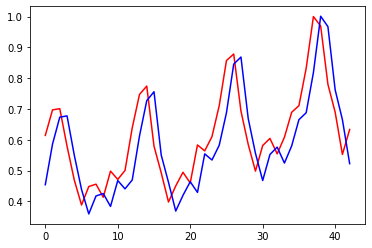

In [ ]:
# visualize the result
plt.plot(y_test,color='red',label='nombre de passagers reel')
plt.plot(y_pred,color='blue',label='nombre de passagers prévus')